# Modifying code from jgarci92 to aggregate classifications and eliminate outliers


Our goal here is to take the original python code and make it so that we can eliminate the bad classifications from Zooniverse users and only pass on good classification data to the machine learning algorithm.

## First import a bunch of modules to use:

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as col
from sklearn.cluster import DBSCAN
from sklearn import metrics
from matplotlib.patches import Ellipse
style.use('ggplot')

import csv

## Open file and store in data:

In [3]:
with open("steelpan-vibrations-classifications.csv") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    data = [r for r in reader]

## Debugging - may remove when done:

In [89]:
for i in range(len(data)):
    #parsed_json = json.loads(data[i][13])
    #print(parsed_json)
    print(data[i][13])

2884309
2883210
2896427
2883741
2883800
2883358
2884294
2896161
2896052
2896034
2883871
2883049
2883720
2883244
2896195
2904263
2884368
2896072
2883275
2884159
2903424
2902713
2896132
2912717
2906328
2884437
2896416
2912622
2903664
2903345
2883496
2903966
2912821
2906537
2913536
2896059
2912568
2903015
2903957
2905372
2905812
2895870
2906087
2905024
2905496
2905472
2904260
2904964
2905157
2903578
2913358
2913830
2906015
2896176
2896054
2905682
2883085
2883249
2912460
2904275
2905220
2905935
2912741
2905197
2905115
2883300
2896455
2913417
2912717
2896039
2912501
2904705
2912457
2913903
2904972
2883544
2896341
2906020
2884035
2913954
2903939
2895899
2884306
2884089
2905347
2913851
2896398
2906342
2906050
2883269
2903143
2906281
2906587
2905468
2904663
2895950
2904788
2906246
2906025
2902644
2904710
2883185
2912700
2903009
2904449
2883246
2884019
2903935
2903918
2904844
2914138
2896045
2913039
2913924
2904256
2903909
2914150
2904326
2913401
2896017
2913368
2905218
2912855
2905683
2895888


2884083
2883101
2883086
2883421
2883416
2883862
2896066
2903417
2883093
2883124
2883359
2896333
2896384
2902705
2903932
2904177
2905349
2906353
2912538
2883064
2884001
2884352
2895886
2883174
2896506
2884157
2903706
2903862
2904112
2904283
2896544
2902648
2903688
2905585
2883348
2883092
2883293
2883053
2896314
2903474
2883981
2884478
2883966
2896156
2902837
2903315
2904427
2904818
2905543
2906275
2913062
2883528
2884119
2895888
2903522
2904889
2883380
2895858
2884282
2884491
2896160
2903330
2904241
2904715
2883539
2883953
2884046
2896115
2902952
2904061
2904087
2905587
2906011
2912397
2912742
2913469
2883550
2883030
2884487
2903267
2903737
2904602
2905013
2906551
2912313
2883066
2884031
2883166
2883487
2904471
2904490
2906037
2912464
2884173
2905371
6279621
6272559
6272563
6279622
6279621
6279624
6272563
2905201
2883048
2883975
2883955
2895830
2902737
2903352
2905218
2905326
2906484
2912327
2913177
2883286
2883404
2884234
2883851
2883143
2883037
2883422
2896284
2902684
2903356
2904500


10518828
2904242
10518130
2884314
2913465
10518204
10519434
2884217
10517835
2903301
2883023
2883148
2895966
2913064
2903829
2896469
2883267
2896256
2904659
2902671
2903986
2902768
2895931
2904912
10518069
2902642
2896298
2896516
10522874
2905003
2896382
2902845
2913249
2905076
2896285
2883076
2902916
10523395
2883240
2902605
2884181
2902772
2903494
2913580
2905415
2883144
2903279
2883442
2913329
2903959
10523821
2904464
2904999
2902910
2906248
2883312
10523958
2912613
2904728
2912707
10517589
2884221
2883423
2904981
2912591
10519392
2895882
10516189
10522899
2895991
2902721
2902710
2902926
2904259
2913389
2904576
2883562
2904783
2905151
2903161
2883241
2884235
2905036
10518021
2883947
2896026
10523096
2905242
2906097
2884297
2883933
2903586
2884379
2884426
2905971
2883547
2884117
2903236
2905737
2896541
2913723
2883281
10515265
2914150
2895824
10517106
2902989
10517560
10517570
2884391
2884315
2884306
2902696
2902637
2895979
2902852
2896298
2903618
2904895
10518198
2905046
2903261
288

2903378
2906286
2904683
2912499
10518326
10523403
2913605
10516849
10517519
10523750
2883373
2902935
2884375
2904067
2904837
2904909
10516901
10517662
10517858
10518183
2902919
2902604
2903256
2883439
2895911
2883087
2902967
2883452
2905932
2895891
2906058
2906232
2912579
2895931
2902729
2903281
2905009
10515699
10518324
10517981
10518848
10519469
10519473
2896026
10523133
2884249
2904136
2883084
2883979
2883850
2903129
2906576
2884330
2884434
2895891
2896132
2903368
2903077
2884240
2883923
2902956
2883280
2883935
2896056
2895978
2904686
2905382
2913130
2902613
2903793
2913993
2903039
10516025
2903233
2895856
2904450
2896422
2904579
2903696
2905311
2904012
2884066
2896519
2902773
2914097
10515441
10515825
10516140
2902802
2903822
2905263
2905403
10515595
10516356
10519100
2896466
2883397
2904617
2906197
2906592
10516650
10516922
10517953
10518025
10518088
10518656
2883183
2884442
2895863
2883105
2884331
2903855
2905558
2913336
2884149
2884488
2896099
2902743
2913493
10515161
10516509
1

2903046
2904926
2905836
2906243
2905015
10515336
2906256
2912721
10515514
2883048
2883442
2902900
2904094
2904499
2913086
2914034
10518003
10519191
10523871
2883895
10515869
2904225
2904870
2905182
2906133
2906369
10515843
2884096
2902646
2904611
2883523
2905571
2905116
2912399
2912705
2912723
2913339
2883296
2913029
2913605
2884172
2903323
2883975
2904836
2884482
2903435
2884216
2895820
2902618
2912453
2912603
2902604
2913803
10515633
10516284
2883422
2896122
2896243
2896276
2903282
2903455
2904203
2904709
2904917
2884102
2896033
2905987
2906119
2884203
2913105
2896090
10516889
10517112
2895856
2902749
10518054
2883133
2896138
2884361
2902968
2904301
2913125
2884134
2913144
2913346
10515657
10516902
10517941
2896547
10518854
2883862
2902648
2903033
2904411
2884362
2903255
2905071
2905936
2912966
2913166
10515510
10515958
10517834
10523415
10524135
2883958
2903883
2884109
2895922
2903338
10515959
10516069
2884149
2883401
2884029
2895843
2905816
2906040
2912368
10515207
10516347
1051673

2884186
2904089
2904978
2905583
2905743
2912325
2896154
2902763
2905159
2905820
2914052
10515666
2895860
2903317
2903457
2903885
2905617
2914163
10515261
10515521
10516030
10523850
10523903
2884057
2884437
2902857
2896414
2884096
2896488
2896040
2905000
2905579
2905164
2913481
10516393
2883464
2884066
2884405
2904368
2905340
2895841
2883344
2883191
2883378
2902919
2903122
2903329
2903495
2905606
2912537
10515429
10518430
10523664
2883978
2902731
2904979
2905510
2906432
2914176
2884355
2884474
2902599
2903752
2904158
2904529
2913470
10516217
10516271
10522924
2896421
2896544
2904691
2905538
2912365
2883124
2903899
10518715
2903274
2903985
2896448
2896042
2902700
2903313
2904752
2905489
10515139
10515497
2905959
2906158
2913659
2913685
10518794
2883564
2883016
2896102
2902711
2903788
2904437
2883546
2884288
2896380
2903008
2905184
10517551
10519091
10523045
10523662
10523934
2884445
2904340
2883854
2883057
2906537
10515355
2895957
10515984
10523211
10523569
10517804
10518744
10518393
105

2896475
2883939
2902739
2895987
2903037
2883070
2884328
2895985
2902996
2903231
2903374
2902621
2904157
2912245
2912437
2912864
10516329
2883492
2896290
2903196
2903347
2883998
2896140
2904996
2905638
2912609
2913525
10515257
10522874
10523011
10523476
2884300
2905833
2905837
2883254
2902691
2902802
2906532
2896181
2883075
2883144
2903134
2883506
2902764
2884365
2883545
2884112
2896109
2903510
2903458
2905070
2904049
2905369
2912749
2883203
2883321
2904060
2905421
2913433
10516943
10517077
2883149
2883310
10518005
2884075
2896065
2896209
10518424
10516225
10522527
10522627
2883886
2902692
2883435
2884003
2904174
2883420
2902667
2904687
2905597
2913468
2913590
2883205
2883419
2903793
2884278
2883079
2883103
2896040
2896417
2903497
10518706
10522651
2883025
2902732
2896475
2906039
2906133
2883109
10515828
2903663
2904111
2902906
2905676
2912582
2912628
2906050
2912708
2913856
10517841
10516177
10523583
10518174
10518284
10518329
10522971
2883529
2884369
2896372
2896392
2902817
2914146
10

10517537
10518925
10518347
10519046
10519282
2883179
2904069
2904875
2905362
2905438
2912401
10517898
10519224
10522839
10523056
2883856
2883868
2896241
2904257
2904658
2906327
2904361
2906436
2912950
2904579
2913263
2913988
10517073
2913633
10517088
10518232
10523192
2883431
2883571
2905956
10517573
2912919
2896326
2902809
10518209
2913837
10522930
2914163
2913199
10516789
2905527
2905960
2884156
2902846
2905609
2912530
2913326
2914209
10518212
10518561
10518722
10523468
2883053
2902691
2905017
2906223
2913171
2913897
2895965
2904740
2905743
2912432
2913619
10515766
10516394
10519344
10522568
10523999
2883019
2905249
2905353
2905413
10515410
10517834
10517885
10522902
10523528
10523806
2883451
2904547
2905979
2906328
2912664
10515903
10517574
10518300
10519248
10522670
2884224
2895820
2904227
2904416
2904816
2904859
2883980
2896246
2883130
2884053
2903136
2903416
2896421
2896013
2884115
2883435
2895851
2896457
2902794
2912723
2913791
2883015
2896245
2902714
2903109
2883339
2884189
288

2902693
2903112
2905297
2905912
2912681
2913447
2914053
2895960
2902800
2903040
2912434
2896317
2905235
2883354
2883388
2883491
2903454
2903765
2913268
2883412
10515491
10516160
10518584
10519211
10523301
2883359
2883878
2883047
2883853
2883554
2903289
2903297
2904089
2904326
2905939
2906533
10515721
10516099
10519148
10523288
2883280
2895883
2905809
2906558
2912347
10516184
10517772
10519335
10522851
10524113
2883055
2883931
2903093
2903872
2904770
10515857
10515872
2883199
2884179
2884235
2884468
2903845
2904012
2906332
2896193
2904628
2896051
2883426
2896464
2903192
2903715
10515203
10515531
10517532
2884346
2896289
2904050
2906292
2912815
10515276
10515602
10515912
10518240
10523055
2904462
2905138
2905609
2905612
2914187
10515661
10516822
10517015
10523698
10523799
2883524
2896023
2896245
2903430
2903121
2903812
2883875
2884332
2896459
2902774
2903959
2905375
2884121
2884452
2903390
2905640
2883181
2883918
2903891
2904201
2904908
2904982
2913872
2913401
2883938
10516245
10516453
1

2884052
2904290
2905905
2905925
2883200
2883269
2913363
10515528
10518631
10522545
10523444
10523914
2895845
2896040
2896344
2896249
2902787
2896397
2905601
2896492
2902734
2905874
2902998
2905440
2913035
10515530
10517666
10523459
2912624
10515789
10516930
10523120
2883085
2904744
2905217
2913664
2903525
2914201
10515670
2906071
10515906
2906257
10517553
2896048
2902624
10518870
10519307
2903009
2903151
2903655
2883086
2883403
2903942
2906529
10515687
2896533
2903226
2903974
2884053
2905208
2883167
2884317
2895884
2896213
2903506
2903807
2883494
2895896
2902675
2903784
2903943
2902641
2904326
2904622
2905673
2905834
2904565
10518629
2883861
2895870
2902770
2903193
2906084
2906233
10515857
10517582
10518795
2883127
10523793
2883232
2884169
2904302
2912282
2883022
2883893
2884142
2883364
2884403
2902991
2903601
2905262
2883516
2905383
2884162
2884245
2896128
2884056
2883452
2896017
2896256
2902691
2904562
2905967
2914029
10515749
2883095
2905241
2912526
2912881
2912945
2895945
2896074
2

2904970
2903110
2906331
2914057
2903185
10515834
2903918
10518942
10522504
10523464
2896144
2902686
2903574
2903961
2903612
2904573
2904960
2912800
2913340
10515602
10515957
2883340
2903769
2904747
2906224
10516282
10517609
2904405
2913049
10515142
2913507
10517760
10519037
2905433
2883425
2895860
2904357
10515458
2883870
2902847
2903185
2903698
2904261
2912532
2883212
2883466
2903172
2905482
2884079
2903242
2904634
2906460
10516259
2896252
2902768
2904025
2913571
10515450
10516857
10516894
10518249
10518470
10523210
2883033
2896505
2902896
2903298
2903898
2904851
10515242
10515809
2883423
2883366
10516358
10518952
2884320
2883850
2905289
2912272
2912950
2913588
2913880
10515436
10515677
10523016
10523626
2884186
2884392
2884364
2902838
2912268
2896297
2914227
2902899
2904963
10516178
10516842
2905190
10516903
10518803
10522858
2883544
2883939
2895971
2902638
2905745
2906529
2913102
2913177
10515222
10516410
2902846
2902914
2904854
2905922
2913234
10515127
10515284
10515417
10516277
10

10516086
2913640
10516830
10517528
10516286
10522503
2896005
10518281
2903880
10519193
2903935
2905019
2903200
2912778
2904157
2904998
2905371
2913638
10515548
10518013
2912685
10515173
10515348
10518569
10515627
10523478
10517535
2903916
10518454
2903917
2883412
2895901
2904356
2903204
2905245
2904547
2905803
2905148
10518023
2913909
10518812
10522914
10523118
10515724
10523718
10518368
2883856
2904144
10519235
10523005
2904288
2883521
2902642
2903010
2905318
2906162
2903987
2912554
2905941
2906342
2913825
10515704
2913561
2914021
10515797
10517914
10517806
10522791
2883511
2896241
2884269
2904446
2904626
2903768
2905115
2912620
2903964
2913927
10518018
2884191
2883342
10518455
10519216
10515794
2895883
2896143
10519250
10523622
2884180
2896445
2903011
2883463
2896090
2903537
2905416
2906433
2912679
2896426
2912951
2903805
2913412
10516687
10523471
2905421
10523544
2896027
2896412
2905294
2906126
2906316
2895850
2913093
10516440
10517869
10519236
2914197
10523902
2883436
10516874
2903

2913034
2913558
10515272
10515398
10515837
2884177
2895887
2913140
2913155
10515535
10515808
10518088
10523829
2883214
2904891
10515129
10516976
10517973
10518022
10518378
10518844
10522881
10523615
2902677
2903755
2905029
2912698
2913392
10515279
10517485
10517972
10518037
10523042
2903041
2903141
2904529
2905844
2906029
2912683
2913847
10518401
10522561
10523594
2903694
2904148
2914049
10515564
10516099
10516780
10518585
10522500
10523261
10523672
2902865
2906057
2912485
2912794
2884186
2903053
2903485
2905224
2912817
10515253
2883108
2884097
2903443
2905427
2906008
2912688
2884032
2884390
2896297
2884293
2903039
2904038
2904474
2905231
2902954
2904155
2883483
2904079
2904319
2905299
2905667
10518063
10518851
10519414
10523713
10523921
2883512
2904371
2904400
2905115
2906164
2913297
2913446
10516098
10523402
10524077
2896083
2903670
2904731
2906418
2912882
2884064
2883323
2896417
2903005
2905419
2884495
2884498
2895905
2904984
2905014
2906084
2912728
10519095
2904262
10519378
2904660

2896235
2903470
2903880
2906276
2906385
2895815
2914122
2903042
2883197
2896374
2902767
2903325
2904749
2905524
2912680
10515243
10515455
10523808
2883914
2896127
2904333
2883575
2904996
2905803
2905879
2896200
2883377
2896017
2904351
2905000
2905160
2905828
2913425
10515285
10516591
10518496
2883379
2883874
2903951
2905821
10515165
10515610
10515983
10516223
10518570
10523375
2883289
2884018
2905358
2905471
2896041
2896473
2903870
2904380
2906276
2913076
2913129
2883350
2883413
2903218
2883584
2903180
2904399
2903618
2895850
2896557
2904846
2896075
2883549
2903138
2903436
2912942
2913296
2913350
10518586
10519365
10522779
2884275
2905675
2896158
2902794
2883351
2895817
2904363
10516737
10516872
10522516
10523061
10523129
10524035
10524128
2883527
2896255
2903945
2912457
2913469
2913501
10523024
10523143
10523235
10524010
2884220
2902818
2904371
2905419
2914228
2884154
2884370
2905813
2906234
2912903
10516608
2883206
2904202
2905576
2896231
2903248
2904267
2905626
2905690
2906008
10518

2904703
2906066
10518810
10519103
10523140
10523238
10524115
2906196
2913010
2913715
2913942
10517739
10518209
10518528
10518854
10522507
10522532
2884146
2903080
2906255
2913089
2913215
2914063
10515133
10515711
10516002
10523446
2883192
2903730
2903994
2913104
10515499
10518539
2883066
2883208
2883463
2884135
2884231
2896170
2883890
2896322
2903507
2896289
2904613
2904932
2905169
2906058
2906269
10515488
2883849
2884128
2904315
2904398
2903276
2905418
10515362
10515732
2903026
2903134
2903872
2904182
2905700
10515375
10515515
10516486
10517682
10519417
2903323
2904095
2905473
2914011
2914127
10515272
10516293
10516939
10519068
10522901
2883149
2895956
2903067
2903756
2904656
2906422
10516308
10518846
10519072
10519137
2904246
2904438
2904465
2906131
2912301
2884266
2913285
2914160
10515417
10518172
10518564
10523359
2896154
2905681
2912247
2912289
2912704
2914102
2883584
2896052
2895832
2883386
2884471
2904674
2912403
2912627
2912767
10518418
10518594
10522962
10523828
2903222
290453

2912256
2912830
10516219
10516877
10523990
2883002
2896473
10518313
10519257
2902800
2905607
2905856
2906534
2912892
10515558
10523971
2883919
10518001
10518132
2902919
2905934
2912321
2913161
10516870
2902688
2903578
10518678
2903645
10518571
2903083
10518479
10517645
10517735
2902613
2903448
2903491
2904058
2913014
10516341
10516449
2896028
10518433
10519378
2903910
2903619
2902840
2905811
2906460
10517875
10518352
10517652
10519452
10517862
2905310
2905911
2912954
2913655
10516058
10516981
10523528
2883330
10517640
10517809
10518329
2904820
2905313
2906298
2906594
10523551
10523643
10523932
2902812
2904758
2905159
10518541
2906065
10518951
2902611
2912723
10517626
10518257
2903183
2903195
2904372
2904769
2905282
2905754
2913478
2884376
10516478
10517960
10522699
10524032
10517612
2904087
2905112
10518748
10519271
2903388
2904041
2905224
2905260
2905472
10515973
10522961
2896165
10518255
10518350
2904040
2904621
2905033
2906475
2913685
2913983
10523942
2895945
10518250
2903795
290532

2905132
2906187
2912312
2913200
10519452
10519473
2903481
2904658
2905164
2912407
2913323
2914221
10515189
2883580
10517635
10517671
10519426
2902799
2903344
2912400
2912863
2913954
10517938
10518646
10517556
10519399
2903538
2903933
2905865
2912806
10516356
10516939
10523967
2884391
2896399
2902716
2903370
2903827
2904153
2904214
2905360
2912318
2914005
10515722
2883430
10517589
2902883
2904929
2904976
2913633
2914222
10523402
10523656
2883252
2896020
10517529
10517551
10517683
10518258
10518513
10518565
2905243
10515604
10516492
2884451
10517755
10518098
10518820
2903158
2905006
2912278
10515891
10522812
10523941
2884061
10519402
2903258
2905236
2913046
10515854
10516510
10523026
10523321
10523669
2895974
10517768
10517829
2902830
2904141
2904949
2906473
2912944
2913628
10515702
2895945
2903845
2904136
2905448
2906533
2912537
2912701
10515688
10522685
2884203
2896436
10517606
2902917
2905967
2912335
2913213
10515400
10516742
10523490
2896215
10518625
2903008
10517583
10517907
1051819

2896188
2896511
2903465
2903639
2896206
2904979
2902626
2883123
2905070
2904769
2903859
2904058
2884259
2884297
2904932
2896422
2896470
2906511
2903467
2905195
2905527
2883219
2914223
10515730
2883235
2896279
2883939
2912670
2912713
2884188
2896395
2883422
2913991
2896446
10515288
10516707
2883267
10516775
2903545
2883989
2905450
2896236
2903573
2896193
2902620
2902758
2903173
2904493
2884183
2905613
2906190
2913285
10515803
2913700
2914111
2883368
2883104
2883538
2884327
2884391
2904360
2904859
2883859
2905289
2883087
2902654
2913857
10515869
10517054
10517871
2903322
2895933
2884382
2912685
2902703
2884415
10518627
2902853
10515150
10522532
10523959
2905624
2913239
2904547
2904675
10516119
2883521
2905027
2912861
2905263
10515388
2905745
2905926
10515726
10516766
10522608
10523303
10523743
2895860
2903646
2903824
2904391
2904683
2912970
2913076
2912407
2912795
2883317
2896003
2883276
2903275
2903529
2883552
2903609
2904539
2896179
2902755
2902888
2883865
2912243
2912911
10515545
2904

2884203
2895971
2904132
2912404
2913670
10516129
10516532
10517558
10523928
2884225
2884110
2906197
2912286
2903144
2904629
2904199
2884434
2883020
2904674
2904772
2913049
2905242
2914112
10517949
2896338
2913151
10517975
2884413
10519360
2903618
2904609
2883995
2906285
2903187
2884176
2904277
2906134
2913929
2883353
10515434
2883857
2904679
2883578
2883373
10516386
2896164
2905436
10516579
10516664
2884297
2896504
2903103
2902723
2912971
2904732
2895940
10517845
10522846
2896385
2884205
2904700
2905553
2896152
2905402
2903536
2904115
2904114
2905505
2912263
2904123
2905703
2884467
2896184
2903164
2903822
2902751
2904482
2906570
2913001
2903055
2903856
2905082
2906157
2913604
2895990
2884168
2903364
2896133
2883030
2902815
2905431
2903379
2905551
2903633
2902656
2903002
2904614
2904842
2913469
10516439
2883482
2884270
2902809
2903088
2904517
2906306
2896183
10522972
10523281
2904171
2905847
2906231
2912388
2884223
2902840
2913240
10517844
10519096
10523554
10523579
2902640
2904078
2912

2905155
2905508
2905548
2913822
10516678
10517065
10519255
2883534
2902726
2903573
2904434
2902658
2903669
2906087
2906498
2913130
2904262
10516960
2904276
10522496
10523781
2904917
2883533
2905493
2884270
10515451
2903131
10515853
2903297
2904780
2905076
2905763
10518113
10516510
10523545
2883163
2902756
2902860
2905110
2905270
2913146
10515808
10522575
10518222
10523204
2904272
10518553
2904973
10519470
2906532
2883107
10515223
2884043
10515721
2903056
2883160
10516448
2905587
10517956
2912945
10515429
10515619
10518157
10517022
10519334
10519107
2904195
10522605
2905299
2905610
2896187
2905974
2906581
2912335
10516551
10518294
10518821
2903252
2902665
2904354
2904726
2904780
2912249
2913057
2903470
10515184
10516902
2884464
2905562
2903078
2902802
2903266
2904295
2883437
2902682
2902931
2905167
2905834
2912577
2913327
2883585
10515926
10517488
2913304
10523440
10523553
10523881
2913949
2884047
2903582
2914050
2905510
10515746
10516249
2906105
2896494
2903339
2906469
2913848
10516806

10518978
10519116
2904782
2905643
2906223
2906539
10515578
10515919
10517097
10523995
10517583
10519156
2904431
2905130
10517015
10522875
10523024
2883355
2884312
2895867
10518509
2903018
2903020
2903562
2904518
2905690
2912816
10523362
2883951
2884237
10517922
10518212
10518275
10518292
10518660
2903460
2905422
2912682
2913467
2896058
10518206
10518847
10519413
2904177
2904860
2912656
2913628
10517093
10523163
10523443
10518855
10523471
2903105
2904780
2884057
10517996
10519337
2903970
2906239
2906428
2913476
10515387
10515819
10522850
2883323
10519218
10519370
2903627
2905859
2912738
2913380
2914002
10515360
10516755
10516760
10523716
2895967
10517664
2903373
10517901
2903933
10517678
2903147
10517638
10519100
2903253
10517563
10518669
2904326
2905792
2914226
10517760
10517681
10518389
2883147
2903054
2903068
2906420
2906552
2912732
2912921
2913603
10515801
2896002
2896478
2903281
2903178
2904094
2904496
2904701
2905020
2905919
10518547
2903876
2906247
2912471
2912479
2913209
1051534

2884167
2896026
2904521
2905237
2905656
2905709
10515580
10515805
10516352
10516891
2883112
2896150
2904946
2905976
2913144
10516211
10516763
10518798
10518944
10519068
2902826
2902916
2903627
2904655
2904776
2905365
2913137
10515948
10516172
10522602
2883385
2884107
2883547
2895943
2904109
2904471
2895979
2902961
2883587
2884459
2895928
2904793
2904022
2883125
2883962
2883339
2896434
2905863
2912874
2913273
2914190
10515371
10518292
10518332
10519255
2884108
2904316
2912911
2913727
2913912
2914034
10518939
10518966
10519114
10519468
2902992
2904328
2912318
2912451
2913952
10515948
10516988
10519017
10523595
10523942
2903013
2883280
2896039
2883342
2884431
2902902
2905366
2905930
2913980
10515254
10516198
10517028
10523973
2883134
2896021
2912293
2912946
2912979
2896180
2883096
2896034
2903265
2906296
2884113
2895848
2895975
2905188
2912451
2912482
2913381
2913522
10518392
2902931
2903167
2884052
2884094
2902998
2884047
2883289
2884160
2895925
2896338
2904111
2905914
2906421
2913010
10

10517728
10519079
10522719
10523041
10523051
2884230
2895911
2903471
2905896
2905922
2912504
10517702
10518089
10518907
2884230
2903625
2904265
2905695
2913119
2913789
10516674
10518413
10523195
10524017
2883216
2895882
2903299
2904768
2906187
2912492
2913174
10515829
10516070
10519117
2883079
2902970
2906033
2912307
2913029
2913129
2913928
2914166
10516962
10524052
2895913
2895940
2896366
2902899
2904170
2905676
10515860
10517070
10517523
10522966
2896505
2904887
2913210
2913384
10516113
10516630
10516880
10517794
10518364
10519345
2883259
2884108
2884119
2902838
2884298
2903221
2904497
2896001
2905228
2896139
2905220
2906193
2912992
10516242
10516751
10517847
2883334
2883863
2883524
2883947
2896335
2903036
2904527
2904822
2906124
2914142
10518502
10522884
2883209
2904578
2896223
2902889
2903064
2903557
10517686
10517892
10518201
10518636
10522759
2883372
2883540
2896344
2903582
2913159
2913233
10516181
10517597
10518794
10519434
2905168
2912984
10518087
10518769
10519160
2904060
2905

2902926
10518031
2905123
2914222
2912542
10515555
2884440
2884087
10516663
2912729
2905133
2895973
2903460
10524128
10522813
10523385
2912559
2905139
10519351
10518080
10515242
2896143
2883340
2904857
2884116
2912895
10515362
2905858
2903364
10522730
2904247
2904775
2904174
2896083
2903217
2906429
10522614
2905641
2883537
2883465
2912693
2883367
10515527
10518068
10523198
10515173
2883561
2883048
2906593
10523123
2902835
2904411
2912782


In [305]:
# Initialize empty dictionary of our subjects to be checked
d = {}
for k in subjects_to_check:
    d['coords'+str(k)] = []
    
# Parse the raw classification data for the subjects to be checked    
for i in range(len(data)):
    parsed_json = json.loads(data[i][11])
    #print(parsed_json)
    if data[i][5] != "Retirement Limit Test" and int(data[i][13]) in subjects_to_check:
        if len(parsed_json)==2:
            for j in range(len(parsed_json[1]['value'])):
                if len(parsed_json[1]['value'][j]['details']) == 1:
                    if isinstance(parsed_json[1]['value'][j]['details'][0]['value'], str):
                        try:
                            fringe_count = int(parsed_json[1]['value'][j]['details'][0]['value'])
                        except ValueError:
                            pass

                    else:
                        fringe_count = parsed_json[1]['value'][j]['details'][0]['value']
                    
                    #print(parsed_json[1]['value'][j]['x'])
                    list = [parsed_json[1]['value'][j]['x'],parsed_json[1]['value'][j]['y'],data[i][13],fringe_count,parsed_json[1]['value'][j]['rx'],parsed_json[1]['value'][j]['ry'],parsed_json[1]['value'][j]['angle']]
                    #print(list)
                    d['coords'+data[i][13]].append(list)
                    #print(data[i][13],"x = ",parsed_json[1]['value'][j]['x'],parsed_json[1]['value'][j]['details'][0]['value'])
        elif len(parsed_json)==1:
            list = ['None','None',data[i][13],0,'None','None','None']
            d['coords'+data[i][13]].append(list)
            print(data[i][13]," No antinodes found!")
print(d)            
print(len(data))

2896034  No antinodes found!
2883049  No antinodes found!
2883085  No antinodes found!
2883249  No antinodes found!
2883544  No antinodes found!
2902644  No antinodes found!
2883185  No antinodes found!
2904769  No antinodes found!
2904979  No antinodes found!
2902815  No antinodes found!
2883412  No antinodes found!
2902805  No antinodes found!
2883180  No antinodes found!
2883251  No antinodes found!
2883437  No antinodes found!
2912657  No antinodes found!
2902623  No antinodes found!
2883293  No antinodes found!
2902751  No antinodes found!
2883109  No antinodes found!
2883235  No antinodes found!
2902767  No antinodes found!
2883293  No antinodes found!
2883199  No antinodes found!
2904769  No antinodes found!
2883180  No antinodes found!
2902718  No antinodes found!
2883240  No antinodes found!
2883185  No antinodes found!
2883185  No antinodes found!
2904769  No antinodes found!
2883015  No antinodes found!
2883080  No antinodes found!
2883162  No antinodes found!
2883486  No an

2906233  No antinodes found!
2883167  No antinodes found!
2883231  No antinodes found!
2902951  No antinodes found!
2902724  No antinodes found!
2883061  No antinodes found!
2884077  No antinodes found!
2902753  No antinodes found!
2883235  No antinodes found!
2883169  No antinodes found!
2883041  No antinodes found!
2912413  No antinodes found!
2883049  No antinodes found!
2883186  No antinodes found!
2902749  No antinodes found!
2883163  No antinodes found!
2883123  No antinodes found!
2884125  No antinodes found!
2883357  No antinodes found!
2883245  No antinodes found!
2883544  No antinodes found!
2883114  No antinodes found!
2883093  No antinodes found!
10515360  No antinodes found!
2883029  No antinodes found!
2902853  No antinodes found!
2883406  No antinodes found!
2883259  No antinodes found!
2883216  No antinodes found!
2903527  No antinodes found!
2883230  No antinodes found!
2902763  No antinodes found!
2902857  No antinodes found!
2902919  No antinodes found!
2902731  No a

10515242  No antinodes found!
2883544  No antinodes found!
2883429  No antinodes found!
2883037  No antinodes found!
2883047  No antinodes found!
2905132  No antinodes found!
2883249  No antinodes found!
2904629  No antinodes found!
2883186  No antinodes found!
2883162  No antinodes found!
2883162  No antinodes found!
2883197  No antinodes found!
2883162  No antinodes found!
2902623  No antinodes found!
2883006  No antinodes found!
2902724  No antinodes found!
2895936  No antinodes found!
2883406  No antinodes found!
2883491  No antinodes found!
2902722  No antinodes found!
2883197  No antinodes found!
2883167  No antinodes found!
2895892  No antinodes found!
2883155  No antinodes found!
2883107  No antinodes found!
2883174  No antinodes found!
2883186  No antinodes found!
2884091  No antinodes found!
2883185  No antinodes found!
2905019  No antinodes found!
2902642  No antinodes found!
2883342  No antinodes found!
2883463  No antinodes found!
2904734  No antinodes found!
2883446  No a

2883207  No antinodes found!
2883357  No antinodes found!
2883295  No antinodes found!
2883245  No antinodes found!
2883284  No antinodes found!
2883031  No antinodes found!
2902959  No antinodes found!
2883185  No antinodes found!
2902691  No antinodes found!
10515227  No antinodes found!
2902853  No antinodes found!
2883370  No antinodes found!
2883163  No antinodes found!
2902756  No antinodes found!
2883107  No antinodes found!
2883125  No antinodes found!
2883357  No antinodes found!
2884173  No antinodes found!
2902749  No antinodes found!
2906193  No antinodes found!
2883061  No antinodes found!
2883170  No antinodes found!
2902641  No antinodes found!
2904734  No antinodes found!
2902959  No antinodes found!
10515227  No antinodes found!
2884077  No antinodes found!
2902623  No antinodes found!
2896034  No antinodes found!
10515242  No antinodes found!
2902764  No antinodes found!
2883022  No antinodes found!
2902724  No antinodes found!
2883355  No antinodes found!
2884077  No

In [30]:
if len(parsed_json)==2:
    for i in range(len(parsed_json[1]['value'])):
        print(parsed_json[1]['value'][i]['x'])
        
elif len(parsed_json)==1:
    print("No antinodes found!")

No antinodes found!


In [19]:
print(parsed_json[1]['value'][0]['angle'])

38.418055344821994


In [131]:
i=len(data)

In [139]:
i=len(data)
test_parsed_json = json.loads(data[i-2][11])
print(data[i-2][11],"\n")
print(test_parsed_json,"\n")
print(test_parsed_json[1]['value'][0]['angle'],"\n")
print(test_parsed_json[1]['value'],"\n")
print(test_parsed_json[1]['value'][0]['details'][0]['value'],"\n")
for j in range(len(test_parsed_json[1]['value'])):
    print("Fringe count = ",test_parsed_json[1]['value'][j]['details'][0]['value'],"\n")


[{"task":"T0","task_label":"**How many antinode regions do you see?**\nClick \"Need some help\" if you are unsure.","value":"2"},{"task":"T1","task_label":"**Draw circles/ellipses around all the antinode regions that you see.**\n\n**_If counting the number of fringes is too difficult,_** be sure to utilize the Field Guide to the right for some examples, zoom in, or choose \"Talk\" after classification to get others' opinions.","value":[{"x":242.4571075439453,"y":182.40179443359375,"rx":0,"ry":5.0001068115234375,"tool":0,"angle":-90,"frame":0,"details":[{"value":"1"}],"tool_label":"Ellipse Draw Tool"},{"x":286.4580841064453,"y":193.4020538330078,"rx":68.02581446417285,"ry":50.32506668103718,"tool":0,"angle":1.531620501962304,"frame":0,"details":[{"value":"1"}],"tool_label":"Ellipse Draw Tool"}]}] 

[{'task': 'T0', 'task_label': '**How many antinode regions do you see?**\nClick "Need some help" if you are unsure.', 'value': '2'}, {'task': 'T1', 'task_label': '**Draw circles/ellipses arou

In [46]:
subject_id = data[i][13]
print(data[i][13])
print(subject_id)

2912782
2912782


In [47]:
def dbscan(crds):
    X = np.array(crds)
    db = DBSCAN(eps=18, min_samples=3).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.xlim(0, 512)
    plt.ylim(0, 384)

In [48]:
def draw_ellipse(ell):
    fig = plt.figure(0)
    ax = fig.add_subplot(111, aspect='equal')
    for e in ell:
        ax.add_artist(e)
        e.set_alpha(.3)
    ax.set_xlim(0, 512)
    ax.set_ylim(0, 384)
    plt.show()

In [302]:
def df_to_center_plt(coords_x):
    x_val = []
    y_val = []
    frng = []
    crds = []
    ell = []
    print(coords_x)
    for centers in coords_x:
        print("centers = ",centers)
        try:
            x_val.append(centers[0])
        except IndexError:
            pass
        try:
            y_val.append(centers[1])
        except IndexError:
            pass
        try:
            frng.append(centers[3])
        except IndexError:
            pass
        try:
            crds.append([centers[0], centers[1]])
        except IndexError:
            pass
        try:
            ell.append(Ellipse(xy=[centers[0], centers[1]], width=centers[4], height=centers[5], angle=centers[6]))
        except IndexError:
            pass
    centers_raw = {'XVal': x_val,
                   'YVal': y_val,
                   'Fringe': frng}
    print(centers_raw)
    centers_df = pd.DataFrame(centers_raw, columns=['XVal', 'YVal', 'Fringe'])
    plt.scatter(centers_df.XVal, centers_df.YVal, s=20, c=cmap_1.to_rgba(centers_df.Fringe), alpha=.6)
    plt.xlim(0, 512)
    plt.ylim(0, 384)
    plt.title('Subject id = %s'%(coords_x[0][2]))
    plt.show()
    dbscan(crds)
    draw_ellipse(ell)

In [288]:
import matplotlib.cm as cm
import matplotlib.colors as col
cmap_1 = cm.ScalarMappable(col.Normalize(1, 11, cm.gist_rainbow))

In [55]:
subjects_to_check = [2902722,
6272559,
6272563,
6279621,
2883174,
2883463,
2883199,
6279622,
6279624,
2902997,
2883022,
2883483,
2896289,
2883180,
2883524,
2883437,
2896298,
2883240,
6272549,
2883214,
2883226,
2903659,
2883119,
2895990,
2883403,
2883355,
2903216,
2883531,
2895860,
2883130,
2883231,
2884186,
2905678,
2883006,
2905172,
2883185,
2902869,
2883521,
2904782,
2905754,
2884387,
2884391,
2895936,
2883170,
2896199,
2884115,
2896026,
2883197,
2883239,
2896179,
2884056,
2883422,
2903710,
2884043,
2883379,
2883079,
2903545,
2883070,
2905235,
2883261,
2883893,
2903115,
2884365,
2884169,
2884260,
2902916,
2883375,
2896279,
2904541,
2883938,
2883207,
2883279,
2903131,
2906197,
2903698,
2883590,
2883388,
2902641,
2904623,
2903987,
2896154,
2903527,
2883534,
2883107,
2896195,
2883496,
2895870,
2896039,
2883544,
2884035,
2902644,
2896045,
2904326,
2904769,
2896152,
2902815,
2903811,
2902805,
2905171,
2883293,
2902751,
2883109,
2904597,
2905986,
2903247,
2905865,
2896064,
6272553,
2903210,
2896119,
2883015,
2883080,
2883162,
2883486,
2884052,
2904169,
2896318,
2883406,
2884046,
2884269,
2895878,
2902764,
2905427,
2884207,
2904329,
2883896,
2903188,
2883342,
2884413,
2883031,
2883163,
2883101,
2883092,
2883528,
2902952,
2883487,
2883281,
2883511,
2883370,
2895887,
2883272,
2902857,
2884444,
2902749,
2895892,
2896138,
2884305,
2883155,
2883167,
2896380,
2883320,
2883563,
2902743,
2902919,
2902633,
2902839,
2903301,
2884057,
2883125,
2883216,
2883256,
2896312,
2903794,
2883230,
2905132,
2896299,
2883494,
2883032,
2902719,
2883141,
2883462,
2883503,
2883095,
2903093,
2904421,
2884144,
2905743,
2906552,
2903018,
2904903,
2905195,
2884096,
2884361,
10518854,
2906361,
2904362,
2884047,
2904443,
2883870,
2883988,
2895884,
2883114,
2903218,
2896421,
2902806,
2883490,
2884146,
2883132,
2896109,
2883295,
2904749,
2883097,
10515227,
2905019,
2883358,
2896052,
2896034,
2883049,
2903664,
2905812,
2903578,
2883085,
2883249,
2905115,
2884306,
2906342,
2906050,
2903918,
2884091,
2904979,
2883412,
2896322,
2883251,
2895898,
2883869,
2912657,
2903083,
2902623,
2883235,
2902767,
2912841,
2884483,
2902718,
2883584,
2905572,
2913249,
2906450,
2902900,
2884107,
2906008,
2903648,
2895926,
2884190,
2902894,
2902753,
2884314,
2883061,
2883250,
2902724,
2903954,
2883075,
2883575,
2883998,
2883012,
2883284,
2883181,
2902852,
2883476,
2884264,
2896029,
2883536,
2902642,
2883186,
2904793,
2883221,
2903195,
2903731,
2883294,
2903272,
2896107,
2906527,
2884354,
2903323,
2904491,
2904141,
2906248,
2884266,
2884252,
2903122,
2883429,
2883117,
2883025,
2883369,
2883169,
2896128,
2883570,
2906461,
2896409,
2913028,
2904939,
2903306,
2895957,
2905906,
2904734,
2883093,
2883064,
2902648,
2904241,
2883550,
2912313,
2884173,
2883037,
2903495,
2883553,
2883904,
2884164,
2903807,
2904675,
10515601,
2883149,
2883578,
2903552,
2905160,
2883435,
2884355,
2913537,
2896537,
10515196,
2883549,
2896210,
2883491,
2896327,
2896498,
2903020,
2883317,
2903842,
2883368,
2884110,
2883029,
2883357,
2902691,
2895843,
2883120,
2895856,
2904315,
2905647,
2895959,
2883259,
2903068,
2905076,
2913329,
2883312,
2884235,
2883547,
2896541,
2903618,
2895915,
2883564,
2883446,
2905087,
2883874,
2903390,
2914226,
2902912,
2883103,
2884167,
2902963,
2883003,
2903446,
2883245,
2902731,
2883572,
2902993,
2884037,
2883995,
2905885,
2884342,
2884248,
2884223,
2883577,
2896002,
2883397,
2904529,
2903976,
2883589,
2905224,
2884125,
2902959,
2903486,
2905583,
2883410,
2903943,
2895861,
2903297,
2896150,
2902951,
2883408,
2902763,
2904682,
2906515,
2904218,
2884137,
2883018,
2884161,
2883519,
2906233,
10523704,
2913605,
2883452,
2895891,
10519473,
10516025,
2903822,
2905703,
2883020,
2903448,
2883041,
2913241,
10515360,
2905960,
10523261,
2902756,
2912517,
2903395,
2884364,
2896464,
2903814,
2895847,
2883961,
2914160,
2904034,
2883047,
2902931,
2903354,
2896494,
2896412,
2906131,
2904157,
2883233,
2896164,
2904409,
2896392,
2904730,
2902875,
2883283,
2904391,
2896149,
2906276,
2884077,
2912413,
2903901,
2904235,
2883123,
2902853,
2903819,
2906533,
2904548,
2884156,
2884182,
10516517,
10519141,
2903732,
2904167,
2902933,
2912312,
10522719,
10515242,
2883121,
2883945,
2902692,
2883583,
10516245,
2883867,
2884423,
2883352,
2904932,
10516513,
10519046,
2904547,
2903616,
2903107,
2883593,
2884205,
2903010,
2896083,
2906132,
10516219,
2902840,
2905803,
2895871,
2913561,
2905269,
2912780,
2904564,
2906193,
10518082,
2884312,
2896502,
2904629,
2904557,
2913754,
10517546,
2896206]

In [261]:
# Initialize empty dictionary of our subjects to be checked
d = {}
for k in subjects_to_check:
    d["coords"+str(k)] = []

In [262]:
d["coords2896502"]

[]

In [265]:
d

{'coords10515196': [[None, None, '10515196', 0, None, None, None],
  [None, None, '10515196', 0, None, None, None],
  [None, None, '10515196', 0, None, None, None],
  [None, None, '10515196', 0, None, None, None],
  [None, None, '10515196', 0, None, None, None],
  [None, None, '10515196', 0, None, None, None]],
 'coords10515227': [[None, None, '10515227', 0, None, None, None],
  [None, None, '10515227', 0, None, None, None],
  [None, None, '10515227', 0, None, None, None],
  [None, None, '10515227', 0, None, None, None],
  [None, None, '10515227', 0, None, None, None],
  [None, None, '10515227', 0, None, None, None],
  [None, None, '10515227', 0, None, None, None]],
 'coords10515242': [[None, None, '10515242', 0, None, None, None],
  [None, None, '10515242', 0, None, None, None],
  [None, None, '10515242', 0, None, None, None],
  [None, None, '10515242', 0, None, None, None],
  [None, None, '10515242', 0, None, None, None],
  [None, None, '10515242', 0, None, None, None]],
 'coords1051

In [166]:
list

[286.4580841064453,
 193.4020538330078,
 '2904411',
 '1',
 68.02581446417285,
 50.32506668103718,
 1.531620501962304]

[[206.796875, 145.75, '2896502', 11, 89.80534505250787, 87.66413177577246, -147.57893523749306], [195.796875, 287.75, '2896502', 2, 37.33630940518894, 46.75467891024384, -48.46822925891715], [213, 152.46665954589844, '2896502', 11, 79.02531240052139, 69.77822009767804, -244.5366549381284], [196, 295.4666748046875, '2896502', 2, 68.88397213744192, 52.8015290010051, 24.6235578873804], [201.53172302246094, 145.16827392578125, '2896502', 10, 64.31132411311162, 63.258221464941116, -263.92754739405154], [196.954833984375, 289.47918701171875, '2896502', 1, 35.87257287254944, 28.4660290711209, 56.7250852721325], [217.796875, 147.75, '2896502', 9, 92.47702417357513, 76.55063683601855, -160.14478563067894], [203.796875, 291.75, '2896502', 2, 43.266615305567875, 43.266615305567875, -146.30993247402023], [208.796875, 150.75, '2896502', 11, 77.87810988975015, 62.433965115151864, -211.90810693565317], [209.796875, 144.5, '2896502', 11, 101.49384217774002, 85.00588214941364, -180.67403689798454], [19

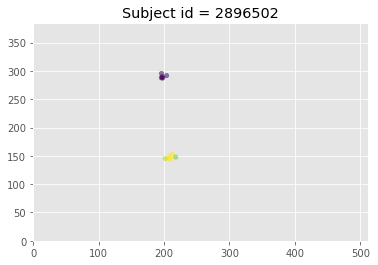

/Users/amorriso/anaconda/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


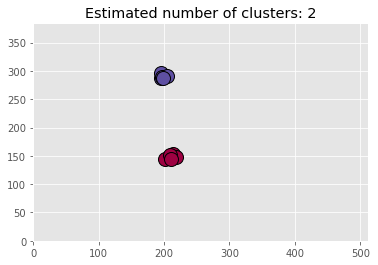

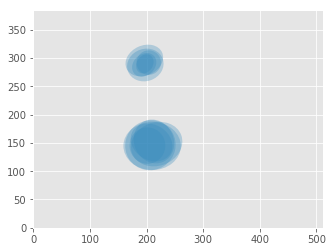

In [306]:
df_to_center_plt(d['coords2896502'])

[[218.296875, 145.75, '2895887', 9, 67.67569726275453, 66.70832032063167, -23.875280853927507], [207.296875, 287.75, '2895887', 1, 35.4682957019364, 36.49657518178932, -260.5376777919744], [206.93331909179688, 291.066650390625, '2895887', 1, 38.32752066508169, 37.36308338453881, 74.47588900324575], [217.93331909179688, 151.06666564941406, '2895887', 1, 79.02531240052139, 73.87827826905551, -140.49232455712743], [229, 143.46665954589844, '2895887', 9, 117.00427342623003, 58.502136713115014, -179.5103044068708], [215.69473266601562, 143.0564422607422, '2895887', 9, 67.18113986078899, 68.99451065764882, 51.84277198922581], [217, 146.46665954589844, '2895887', 10, 75.28612089887484, 71.79310551856634, -50.38931175997341], [201, 281.04998779296875, '2895887', 2, 53.009433122794285, 49.2036463060888, -37.56860286233962], [217, 148.0500030517578, '2895887', 7, 79.90619500389191, 77.88452991448301, -15.642246457208728], [210.46875, 144, '2895887', 11, 78.16009211867653, 70.34912934784623, -5.7

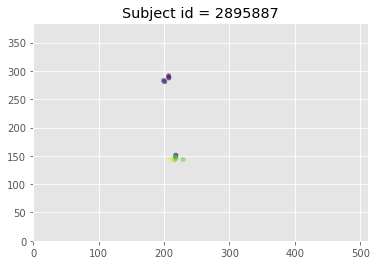

/Users/amorriso/anaconda/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


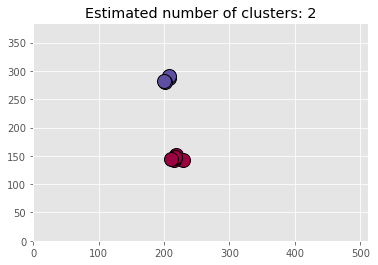

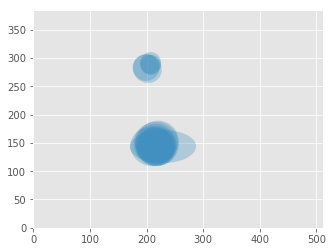

In [304]:
df_to_center_plt(d['coords2895887'])

In [312]:
df_to_center_plt(d['coords2883463'])

[[155, 93.44999694824219, '2883463', 1, 44.181444068749045, 22.090722034374522, 95.1944289077348], [361, 163.4499969482422, '2883463', 1, 51.40038910358559, 25.700194551792794, -142.90716270295846], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], [143.8125, 142.75, '2883463', 2, 301.59741378201505, 150.79870689100753, -28.51948999456811], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], [214.5, 151.96665954589844, '2883463', 2, 19.1049731745428, 21.02379604162864, -83.99099404250548], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], [160.0364532470703, 142.834228515625, '2883463', 2, 44.73269155757933, 38.31170333505653, -113.72041773042523], [212.6490936279297, 153.46304321289062, '2883463', 5, 47.90344714726392, 53.13613141797525, -59.331083059182994], ['None', 'None', '2883463', 0, 'None', 'None'

ValueError: could not convert string to float: 'None'

In [311]:
for key, value in d.items():
    #print(len(value))
    if len(value)  >0 and value[0][0] != 'None':
#    if len(value)  >0 and None not in value[key]:
        print("key =",key,"value = ", value,"\n")
    #if len(d.items()) > 0:
        df_to_center_plt("{}".format(key))
    #df_to_center_plt(key)

key = coords2883463 value =  [[155, 93.44999694824219, '2883463', 1, 44.181444068749045, 22.090722034374522, 95.1944289077348], [361, 163.4499969482422, '2883463', 1, 51.40038910358559, 25.700194551792794, -142.90716270295846], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], [143.8125, 142.75, '2883463', 2, 301.59741378201505, 150.79870689100753, -28.51948999456811], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], [214.5, 151.96665954589844, '2883463', 2, 19.1049731745428, 21.02379604162864, -83.99099404250548], ['None', 'None', '2883463', 0, 'None', 'None', 'None'], [160.0364532470703, 142.834228515625, '2883463', 2, 44.73269155757933, 38.31170333505653, -113.72041773042523], [212.6490936279297, 153.46304321289062, '2883463', 5, 47.90344714726392, 53.13613141797525, -59.331083059182994], ['None', 'None',

ValueError: arrays must all be same length

In [270]:
key

'coords2902722'

In [272]:
value[0]

[None, None, '2902722', 0, None, None, None]